### 0. Library

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re

In [22]:
df = pd.read_csv('E:/UIT/Năm-2/Kì-2/Predicting-Popularity-of-Vietnamese-Articles/2. Data Pre-processing/dataset2.csv')

### 1. EDA (Exploratory Data Analysis)

In [23]:
df_copy = df.copy()

#### 1.1. Title

Text(0.5, 1.0, 'Phân bố của độ dài tiêu đề')

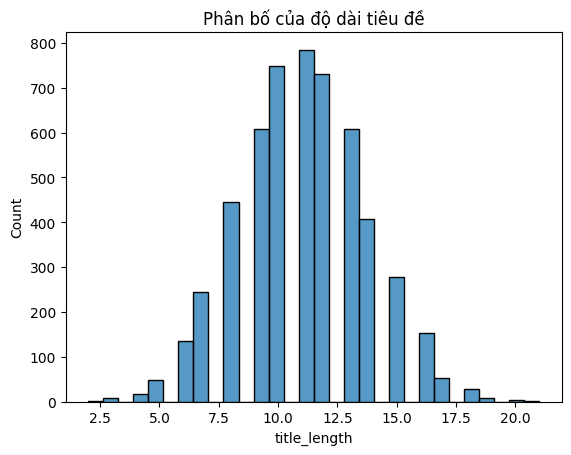

In [24]:
#Phân tích độ dài tiêu đề
df_copy['title_length'] = df_copy['title'].str.count(r'\b\w+\b')
sns.histplot(df_copy['title_length'], bins=30)
plt.title('Phân bố của độ dài tiêu đề')

<Axes: title={'center': 'Top 20 từ phổ biến trong tiêu đề'}, ylabel='title'>

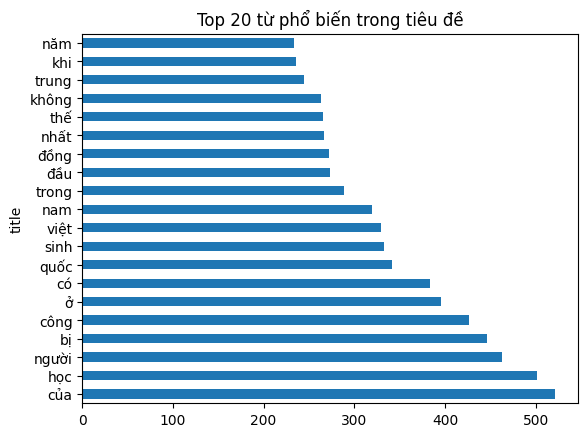

In [25]:
#Top keywords phổ biến trong tiêu đề:
words = df_copy['title'].str.lower().apply(lambda x: re.findall(r'\b\w+\b', x)).explode()
common_words = words.value_counts().head(20)
common_words.plot(kind='barh', title='Top 20 từ phổ biến trong tiêu đề')


#### 1.2. Tags

In [26]:
def parse_tags(x):
    if isinstance(x, str) and x.strip() != '':
        return [tag.strip() for tag in x.split(',')]
    else:
        return []

df_copy['tags_parsed'] = df_copy['tags'].apply(parse_tags)
df_copy['num_tags'] = df_copy['tags_parsed'].apply(len)

Text(0.5, 1.0, 'Số Tags của 1 bài báo')

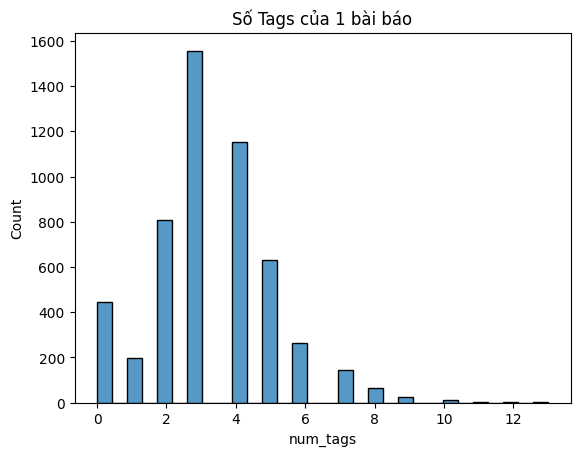

In [27]:
sns.histplot(df_copy['num_tags'], bins = 30)
plt.title('Số Tags của 1 bài báo')

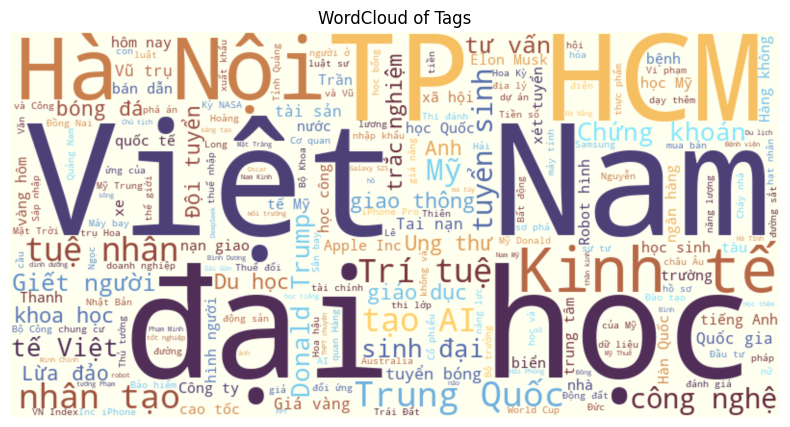

In [28]:
# Chuẩn bị text từ tags
all_tags = df_copy['tags'].dropna().explode()
tag_text = ' '.join(all_tags.astype(str))

# Tạo WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='ivory',
    colormap='managua'
).generate(tag_text)

# Hiển thị
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation= 'quadric')
plt.axis('off')
plt.title('WordCloud of Tags')
plt.show()


In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5310 non-null   object 
 1   date               5310 non-null   object 
 2   wordcount          5310 non-null   float64
 3   comments           5310 non-null   float64
 4   interactions       5310 non-null   float64
 5   images             5310 non-null   float64
 6   videos             5310 non-null   float64
 7   tags               4865 non-null   object 
 8   category           5310 non-null   int64  
 9   time_since_posted  5310 non-null   float64
 10  popularity_score   5310 non-null   float64
 11  filtered_tags      5310 non-null   object 
 12  comments_norm      5310 non-null   float64
 13  interactions_norm  5310 non-null   float64
 14  time_log           5310 non-null   float64
 15  title_length       5310 non-null   int64  
 16  tags_parsed        5310 

#### 1.3. Descriptive Statistics

In [30]:
# Thống kê mô tả
df_copy[['wordcount', 'comments', 'interactions', 'images', 'videos',
     'time_since_posted', 'popularity_score', 'time_since_posted', 'title_length', 'num_tags']].describe().round(2)

,wordcount,comments,interactions,images,videos,time_since_posted,popularity_score,time_since_posted,title_length,num_tags
count,5310.00,5310.00,5310.00,5310.00,5310.00,5310.00,5310.00,5310.00,5310.00,5310.00
mean,660.98,2.03,4.37,1.43,0.02,852.80,0.01,852.80,11.05,3.35
std,311.65,1.45,3.10,0.98,0.03,445.89,0.01,445.89,2.64,1.79
min,2.00,0.00,0.00,0.00,0.00,236.32,0.00,236.32,2.00,0.00
25%,458.00,0.70,1.51,1.00,0.00,511.00,0.01,511.00,9.00,2.00
50%,622.00,1.99,4.63,1.00,0.00,741.63,0.02,741.63,11.00,3.00
75%,822.75,3.29,7.04,2.00,0.08,1075.96,0.02,1075.96,13.00,4.00
max,1369.88,4.22,8.79,3.50,0.08,1923.41,0.04,1923.41,21.00,13.00


In [31]:
def plot_series(df, x_col, y_col, series_name='', series_index=0,
                         smooth=None, window=100, bins=70, figsize=(10, 5.2)):
    palette = sns.color_palette('Dark2')
    df_sorted = df.sort_values(x_col)

    fig, ax = plt.subplots(figsize=figsize, layout='constrained')

    df_binned = df_sorted.copy()
    df_binned['x_bin'] = pd.cut(df_binned[x_col], bins=bins)
    grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()
    grouped['x_bin_center'] = grouped['x_bin'].apply(lambda x: x.mid)
    ax.plot(grouped['x_bin_center'], grouped[y_col],
            label=series_name or f'{y_col} (bin)',
            color=palette[series_index % len(palette)])

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{y_col} theo {x_col}')
    if series_name:
        ax.legend()
    sns.despine(fig=fig, ax=ax)
    plt.show()

In [32]:
def plot_binned_average(df, x_col, y_col, bins=70, label=''):
    df_binned = df.copy()
    df_binned['x_bin'] = pd.cut(df_binned[x_col], bins=bins)
    grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()
    grouped['x_bin_center'] = grouped['x_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 5))
    sns.lineplot(x='x_bin_center', y=y_col, data=grouped, label=label or y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Average {y_col} by {x_col} Bins')
    plt.legend()
    sns.despine()
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\4069180926.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


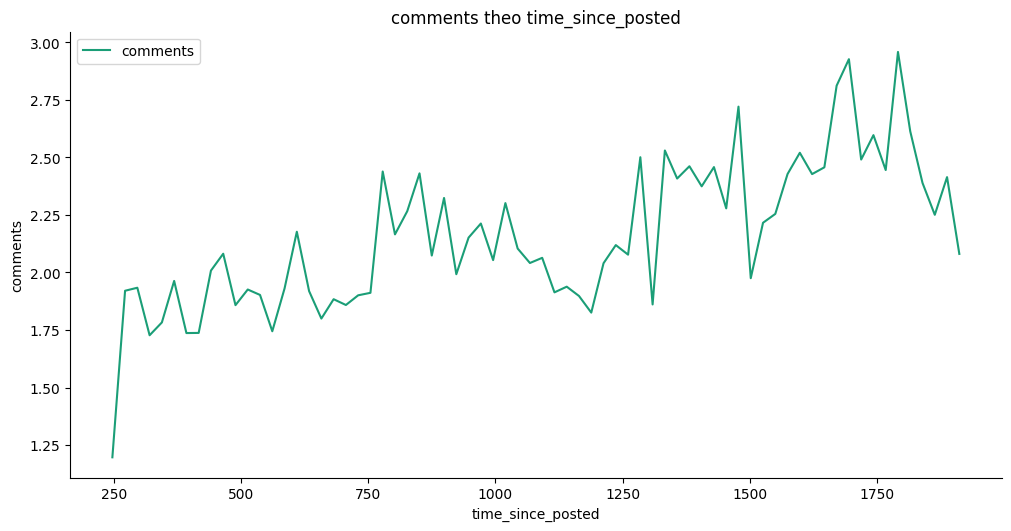

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\4069180926.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


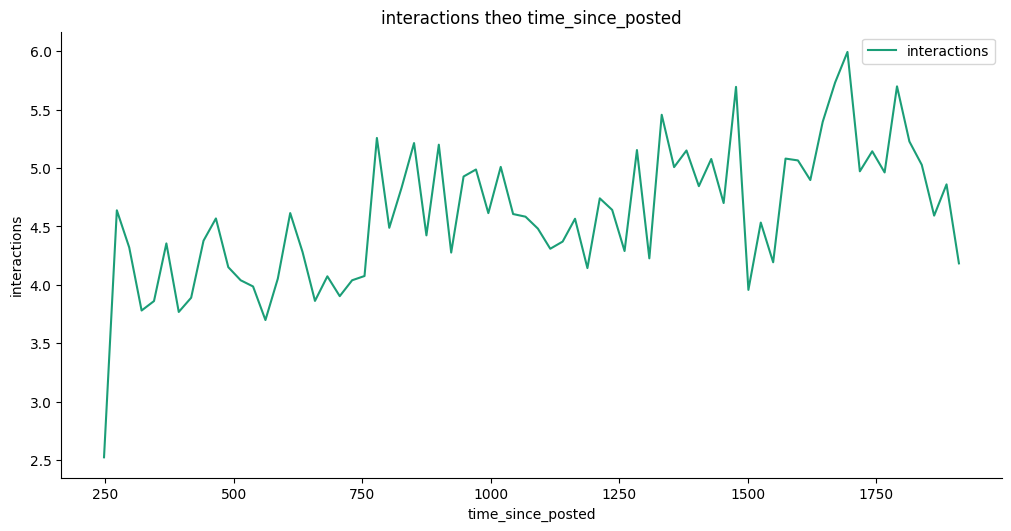

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\4069180926.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


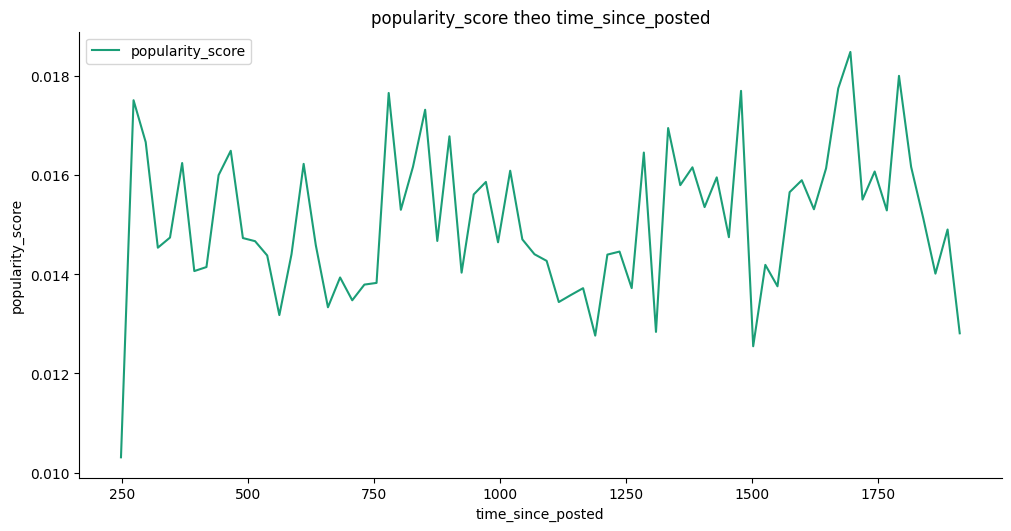

In [33]:
y_list = ['comments', 'interactions','popularity_score']

for i, y in enumerate(y_list):
    plot_series(df_copy, x_col='time_since_posted', y_col=y, series_name=f'{y}')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


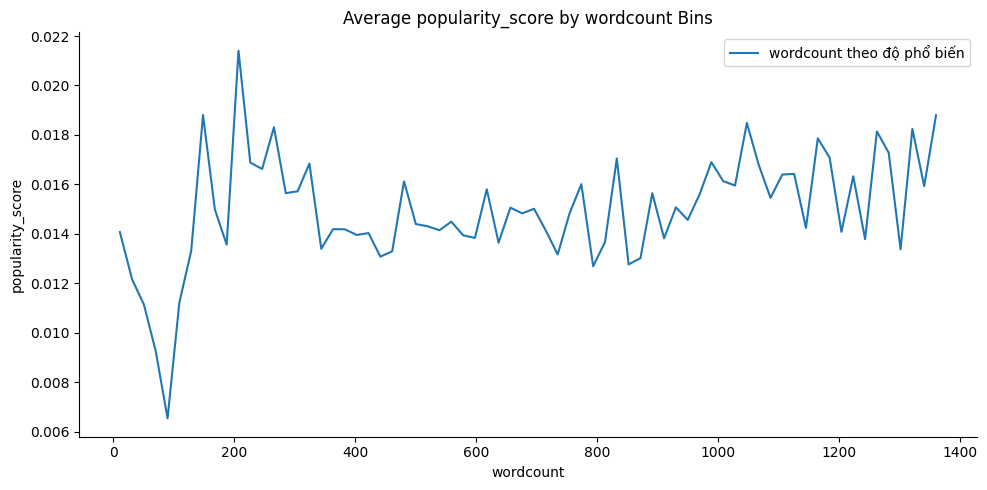

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


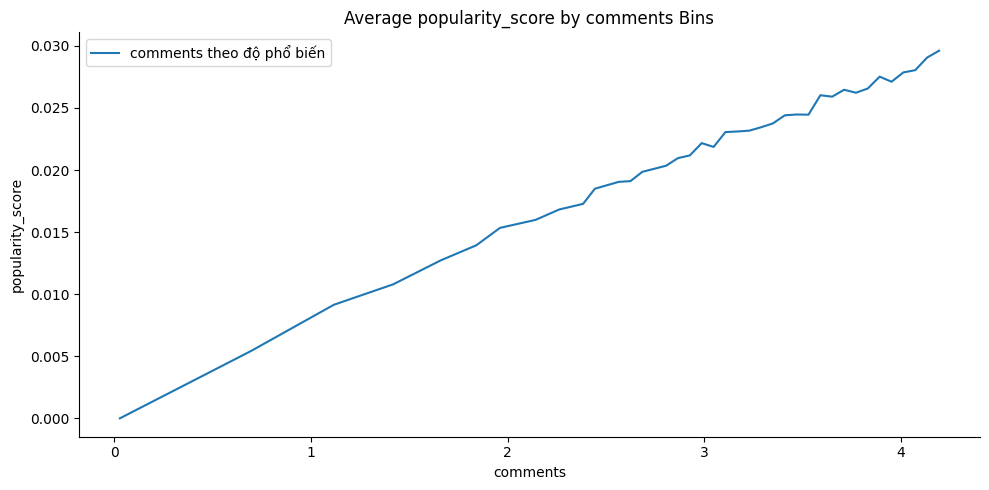

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


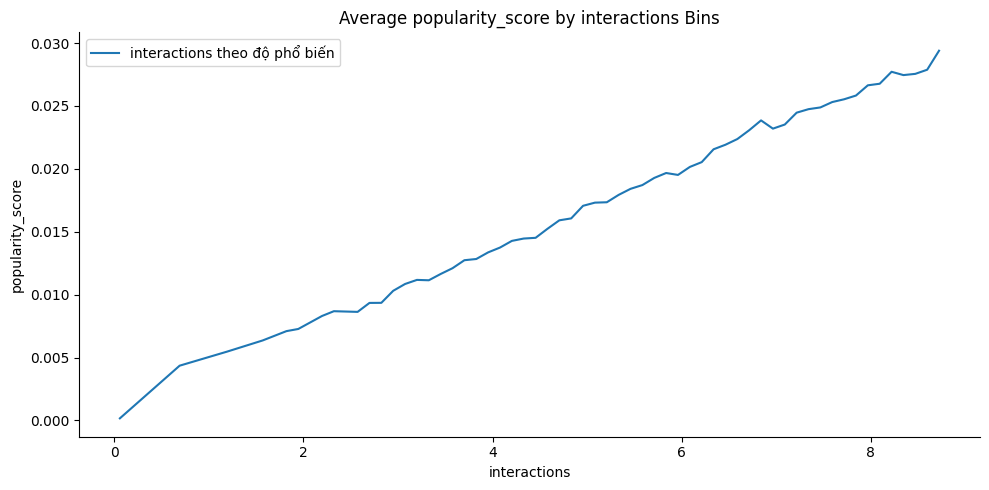

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


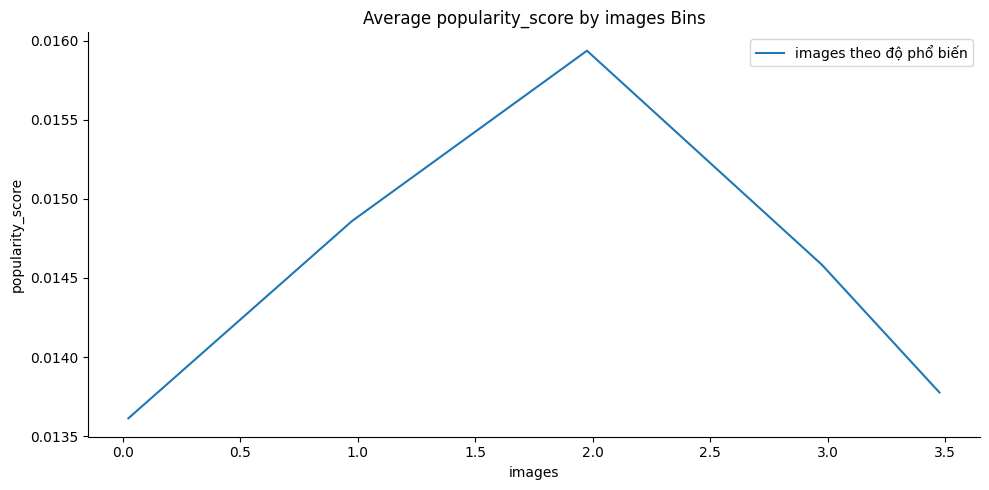

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


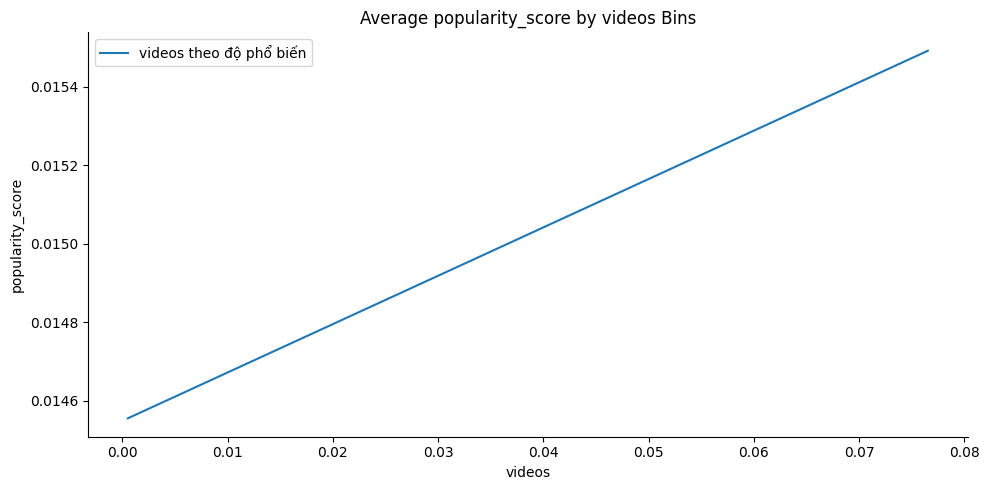

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7092\478522761.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_binned.groupby('x_bin')[y_col].mean().reset_index()


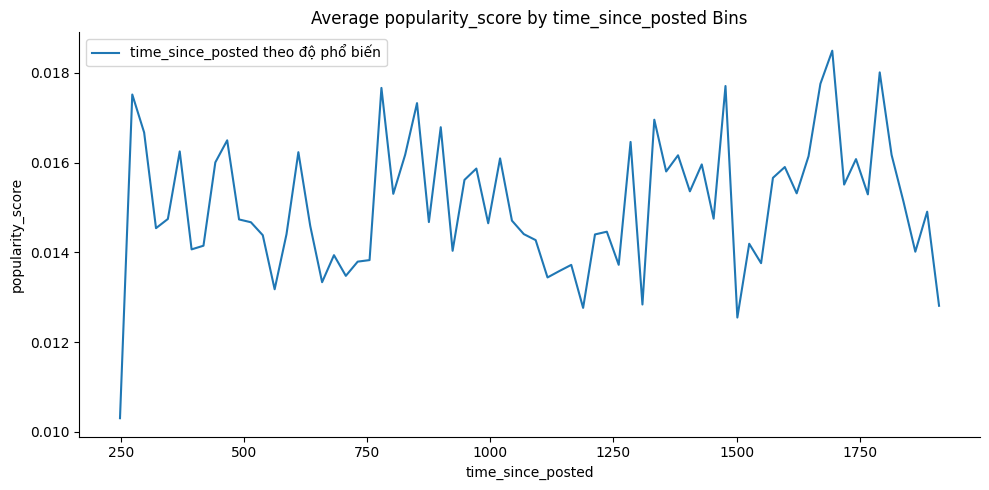

In [34]:
x_list = ['wordcount', 'comments', 'interactions', 'images', 'videos', 'time_since_posted']

for i, x in enumerate(x_list):
    plot_binned_average(df_copy, x_col=x, y_col='popularity_score', label=f'{x} theo độ phổ biến')

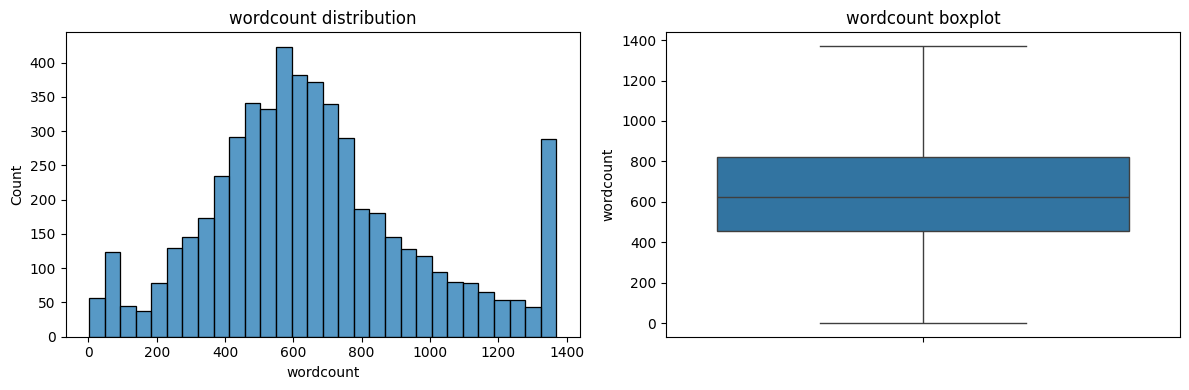

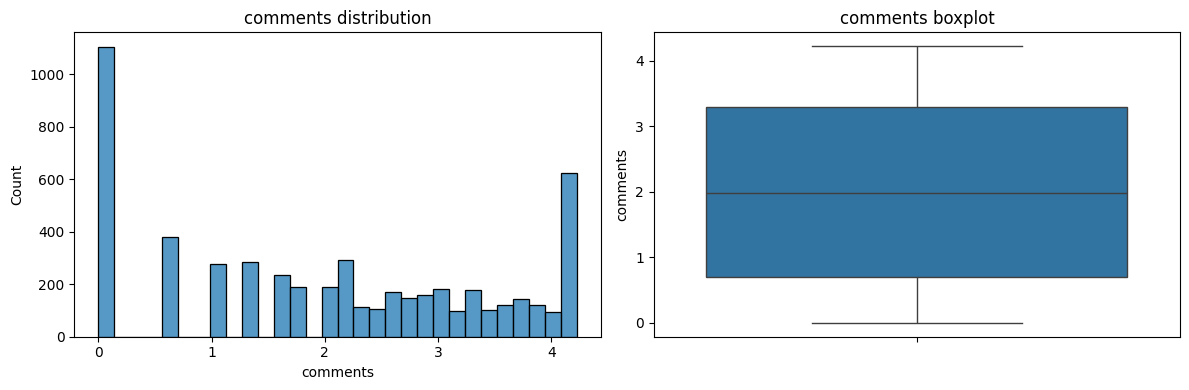

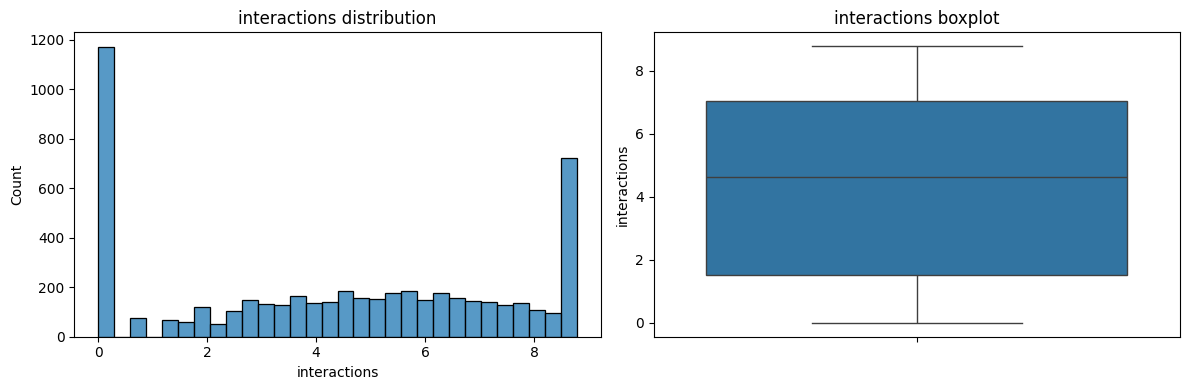

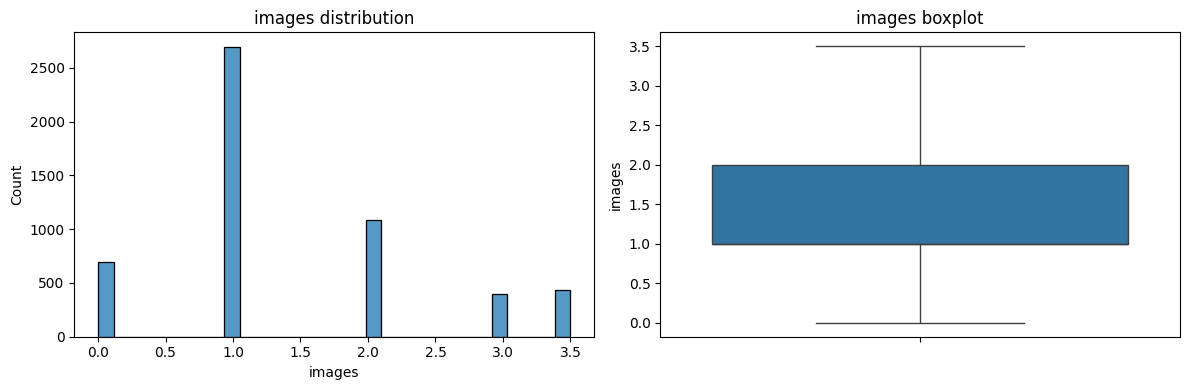

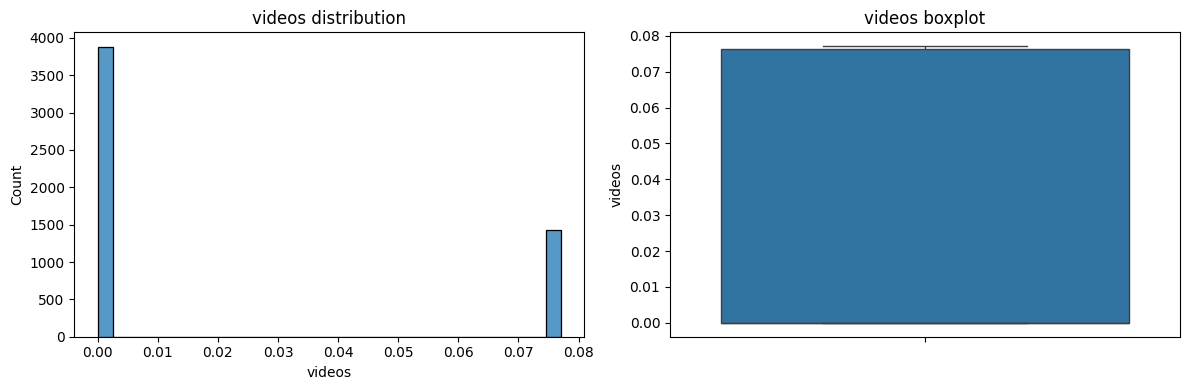

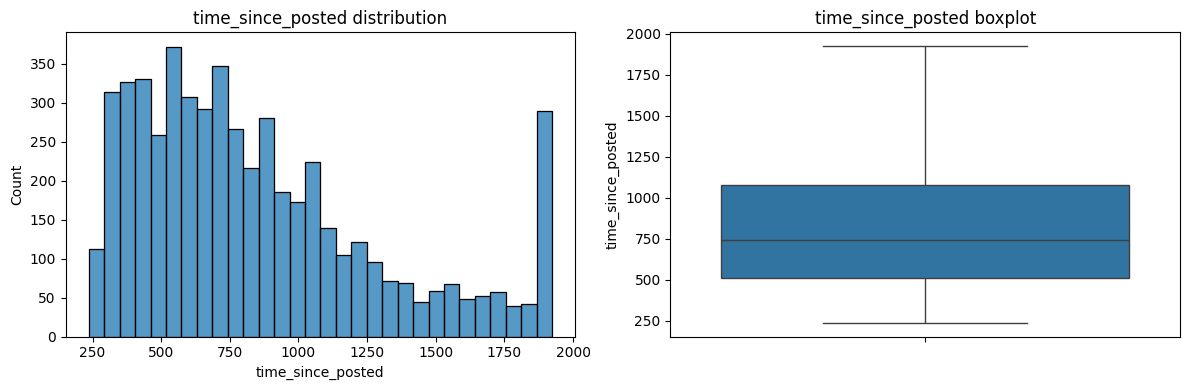

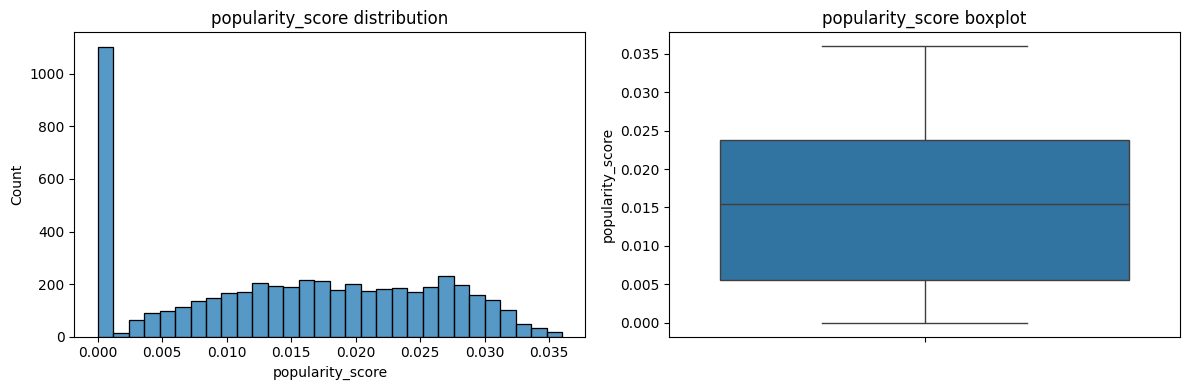

In [35]:
#Histogram và boxplot cho mỗi biến
numeric_cols = ['wordcount', 'comments', 'interactions', 'images', 'videos', 'time_since_posted', 'popularity_score']

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_copy[col], bins=30, ax=ax[0])
    ax[0].set_title(f'{col} distribution')
    sns.boxplot(y=df_copy[col], ax=ax[1])
    ax[1].set_title(f'{col} boxplot')
    plt.tight_layout()
    plt.show()

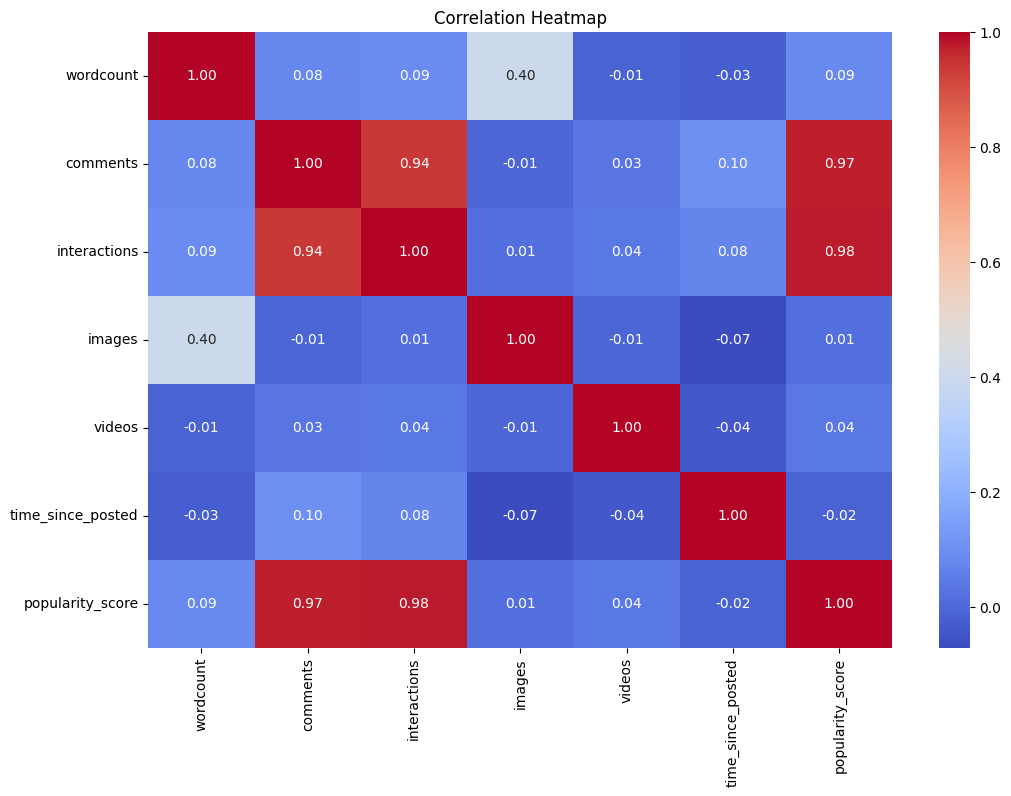

In [36]:
plt.figure(figsize=(12, 8))
corr = df_copy[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Biến categorical**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '9'),
  Text(1, 0, '2'),
  Text(2, 0, '6'),
  Text(3, 0, '7'),
  Text(4, 0, '8'),
  Text(5, 0, '5'),
  Text(6, 0, '3'),
  Text(7, 0, '1'),
  Text(8, 0, '4')])

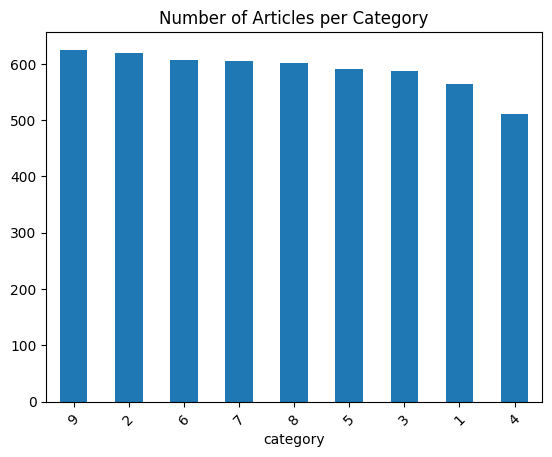

In [37]:
# Số lượng bài viết theo category
df_copy['category'].value_counts().plot(kind='bar')
plt.title('Number of Articles per Category')
plt.xticks(rotation=45)

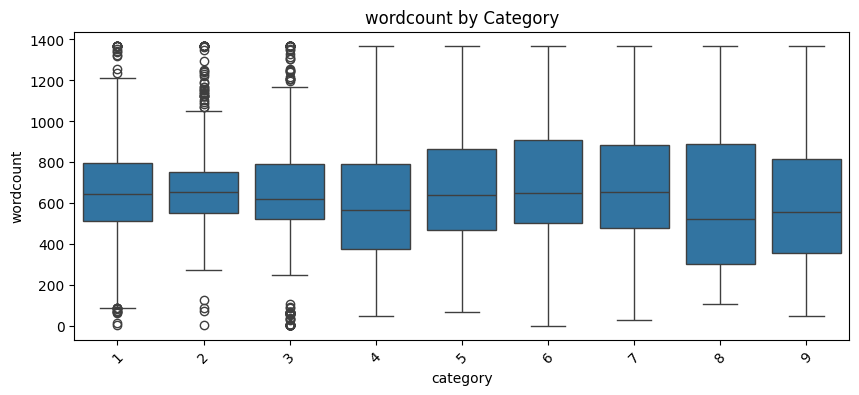

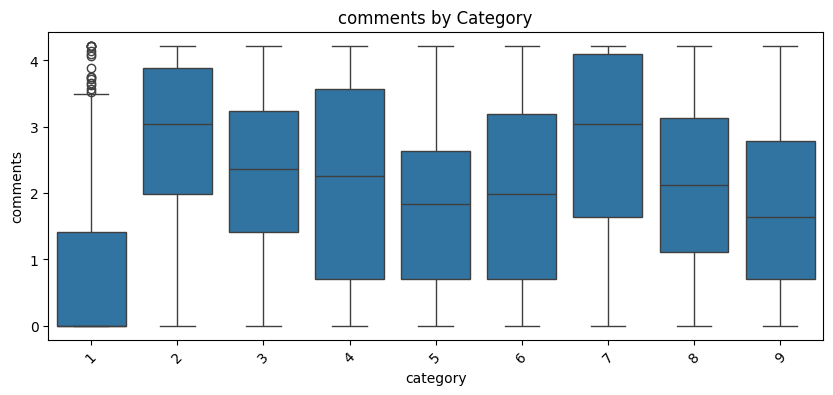

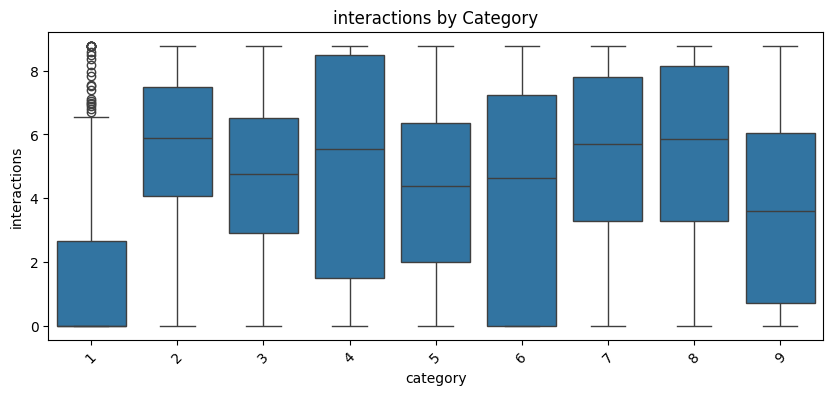

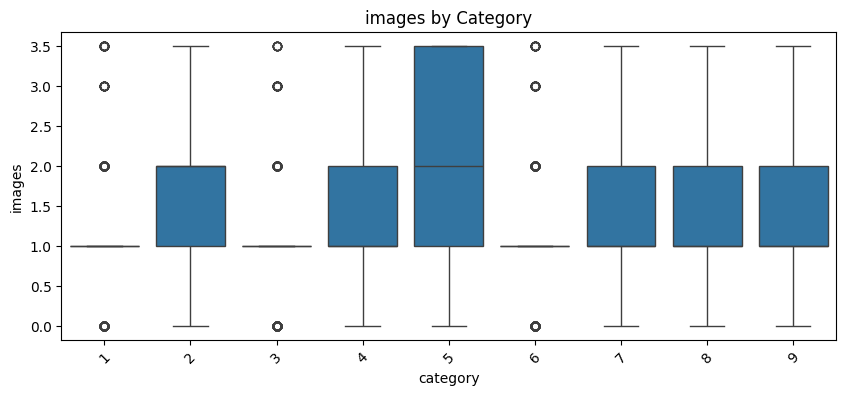

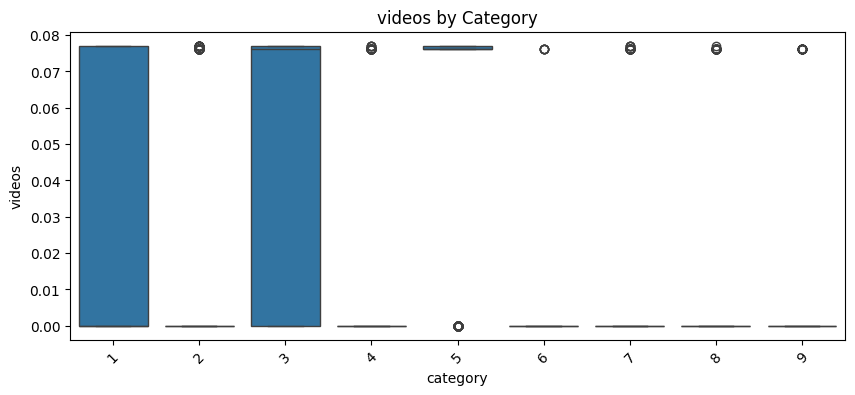

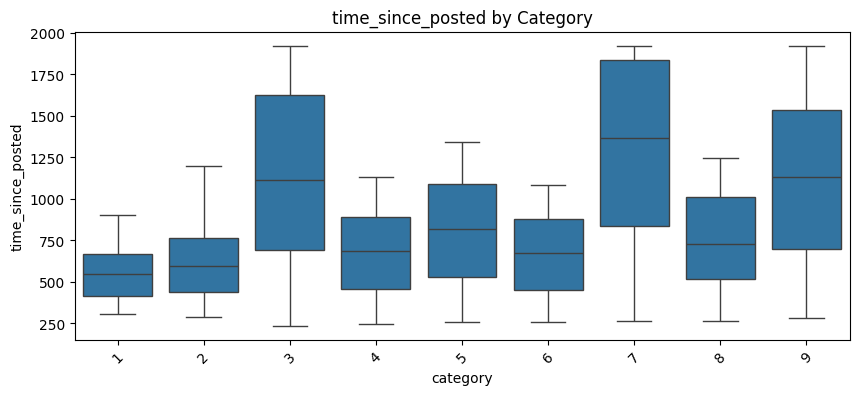

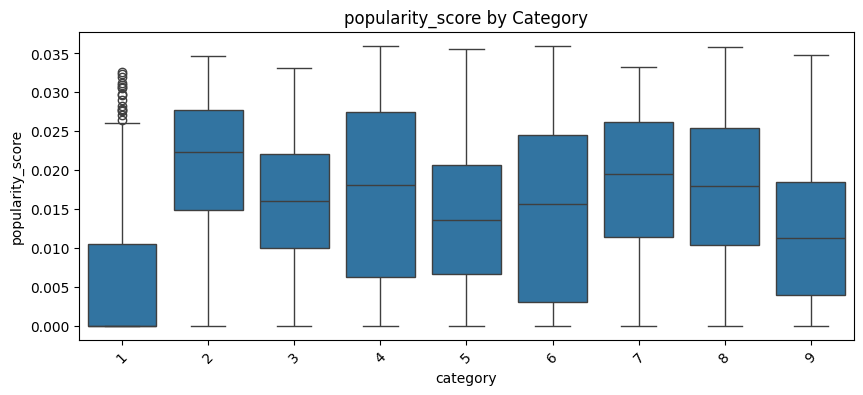

In [38]:
# So sánh các chỉ số numeric theo category
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='category', y=col, data=df_copy)
    plt.title(f'{col} by Category')
    plt.xticks(rotation=45)
    plt.show()

#### 1.4. Time

Text(0.5, 1.0, 'Articles per Month')

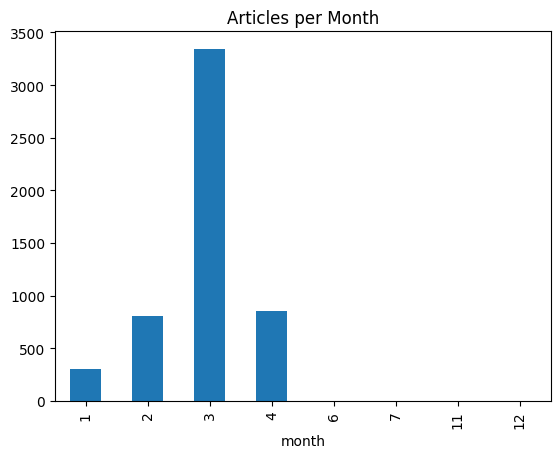

In [39]:
# Loại bỏ phần 'Thứ ...,' và '(GMT+7)' => giữ lại '12/3/2025, 16:09'
df_copy['date_cleaned'] = df_copy['date'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4}, \d{1,2}:\d{2})')[0]

# Chuyển thành datetime
df_copy['date_parsed'] = pd.to_datetime(df_copy['date_cleaned'], format='%d/%m/%Y, %H:%M')

# Kiểm tra và loại bỏ các giá trị NaT trong 'date_parsed'
df_copy = df_copy.dropna(subset=['date_parsed'])

df_copy['year'] = df_copy['date_parsed'].dt.year
df_copy['month'] = df_copy['date_parsed'].dt.month
df_copy['day_of_week'] = df_copy['date_parsed'].dt.day_name()

# Vẽ biểu đồ số lượng bài viết theo tháng
df_copy['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Articles per Month')

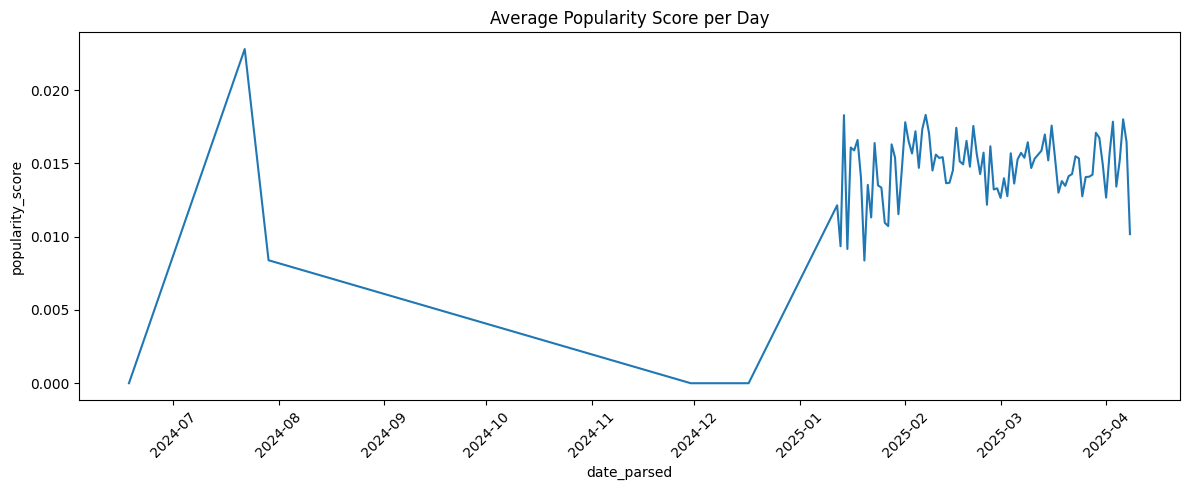

In [40]:
df_daily = df_copy.groupby(df_copy['date_parsed'].dt.date)['popularity_score'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_daily, x='date_parsed', y='popularity_score')
plt.title('Average Popularity Score per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()